# Import required modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

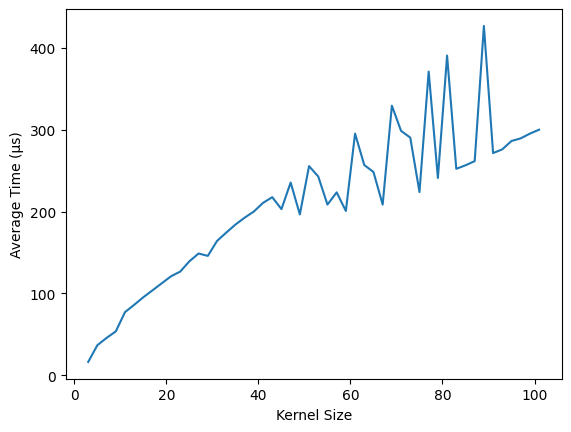

In [2]:
df = pd.read_csv('profile_cuda_1d_final.csv')

# Filter the DataFrame to only include rows where Name is equal to the desired value
filtered_df_x = df[df['Name'] == 'void gaussian_blur_x<uchar3, uchar3, float3>(float*, int, cv::cuda::PtrStepSz<uchar3>, cv::cuda::PtrStepSz<uchar3>)']

# Create the plot
plt.plot(filtered_df_x['kernel_size'], filtered_df_x['Avg'])
plt.xlabel('Kernel Size')
plt.ylabel('Average Time (μs)')
plt.show()


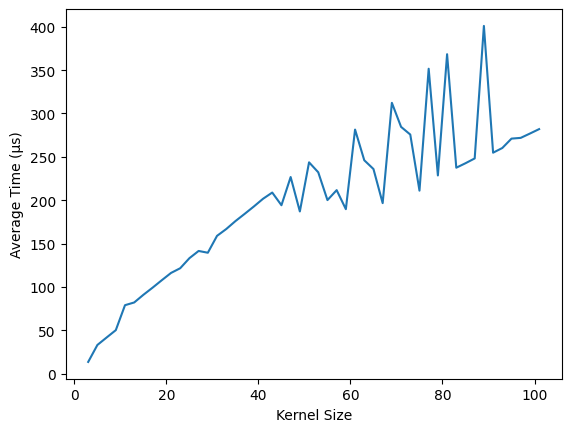

In [3]:
df = pd.read_csv('profile_cuda_1d_final.csv')

# Filter the DataFrame to only include rows where Name is equal to the desired value
filtered_df_y = df[df['Name'] == 'void gaussian_blur_y<uchar3, uchar3, float3>(float*, int, cv::cuda::PtrStepSz<uchar3>, cv::cuda::PtrStepSz<uchar3>)']

# Create the plot
plt.plot(filtered_df_y['kernel_size'], filtered_df_y['Avg'])
plt.xlabel('Kernel Size')
plt.ylabel('Average Time (μs)')
plt.show()


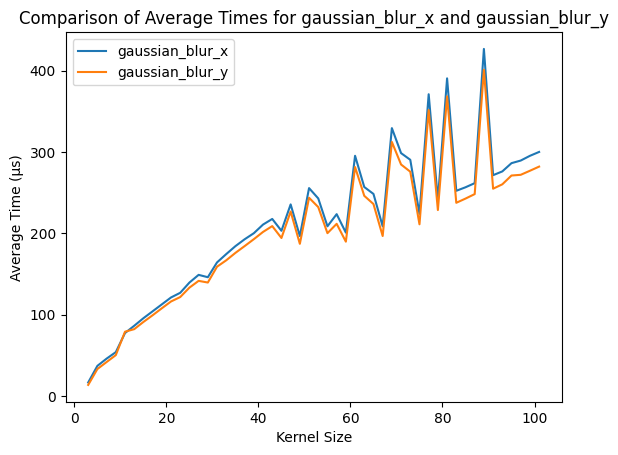

In [4]:
plt.plot(filtered_df_x['kernel_size'], filtered_df_x['Avg'], label='gaussian_blur_x')
plt.plot(filtered_df_y['kernel_size'], filtered_df_y['Avg'], label='gaussian_blur_y')

# set the axis labels and title
plt.xlabel('Kernel Size')
plt.ylabel('Average Time (μs)')
plt.title('Comparison of Average Times for gaussian_blur_x and gaussian_blur_y')

# show the legend
plt.legend()

# show the plot
plt.show()


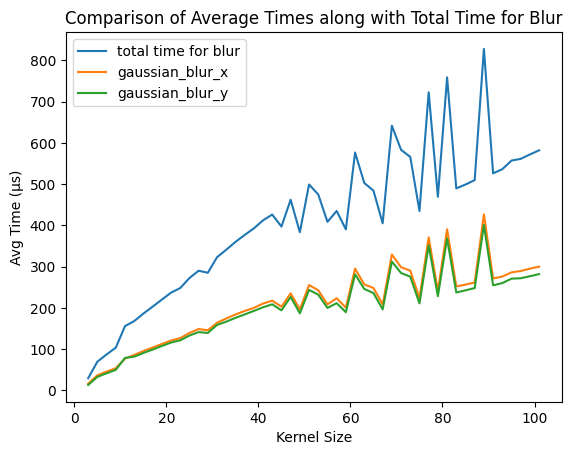

In [5]:
merged_df = pd.merge(filtered_df_x, filtered_df_y, on='kernel_size')
merged_df['Avg_Sum'] = merged_df['Avg_x'] + merged_df['Avg_y']
plt.plot(merged_df['kernel_size'], merged_df['Avg_Sum'], label="total time for blur")
plt.plot(filtered_df_x['kernel_size'], filtered_df_x['Avg'], label='gaussian_blur_x')
plt.plot(filtered_df_y['kernel_size'], filtered_df_y['Avg'], label='gaussian_blur_y')
plt.title('Comparison of Average Times along with Total Time for Blur')

plt.xlabel('Kernel Size')
plt.ylabel('Avg Time (μs)')
plt.legend()

plt.show()


In [6]:
df_2d_cuda = pd.read_csv('profile_cuda_2d_final.csv')


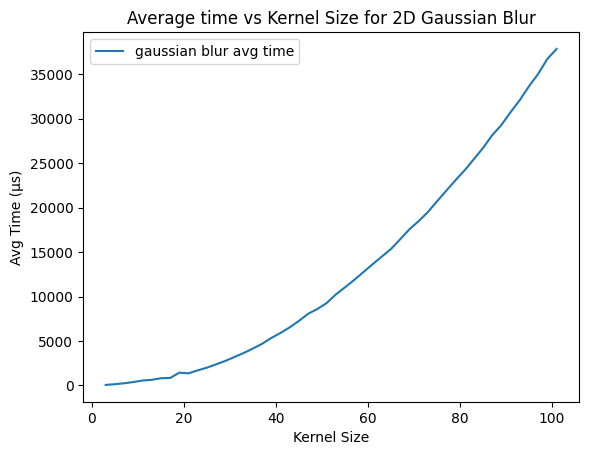

In [7]:
plt.plot(df_2d_cuda['kernel_size'], df_2d_cuda['Avg'], label='gaussian blur avg time')
plt.title('Average time vs Kernel Size for 2D Gaussian Blur')
plt.xlabel('Kernel Size')
plt.ylabel('Avg Time (μs)')
plt.legend()
plt.show()

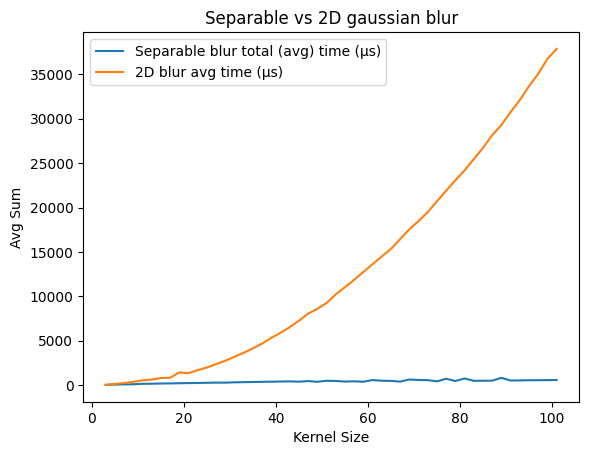

In [8]:
plt.title("Separable vs 2D gaussian blur")
plt.plot(merged_df['kernel_size'], merged_df['Avg_Sum'], label="Separable blur total (avg) time (μs)")
plt.plot(df_2d_cuda['kernel_size'], df_2d_cuda['Avg'], label='2D blur avg time (μs)')
plt.xlabel('Kernel Size')
plt.ylabel('Avg Sum')
plt.legend()
plt.show()


In [9]:
df_multi_thread = pd.read_csv('profile_multi_threaded.csv')
df_multi_thread.head()

,KERNEL_SIZE,MAX_RUN_TIME,MIN_RUN_TIME,AVG_RUN_TIME,MEDIAN_RUN_TIME
0,3,27.4017,9.69179,15.1146,14.2623
1,5,33.1849,24.71130,27.7350,27.4469
2,7,70.5513,50.55360,58.7697,59.3271
3,9,103.8800,81.04660,93.1267,93.1682
4,11,141.8860,124.14000,131.4240,131.4890


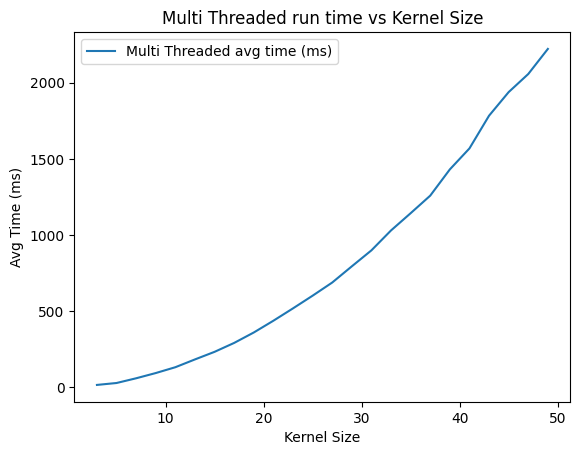

In [10]:
plt.title("Multi Threaded run time vs Kernel Size")
plt.plot(df_multi_thread['KERNEL_SIZE'], df_multi_thread['AVG_RUN_TIME'], label='Multi Threaded avg time (ms)')
plt.xlabel('Kernel Size')
plt.ylabel('Avg Time (ms)')
plt.legend()
plt.show()

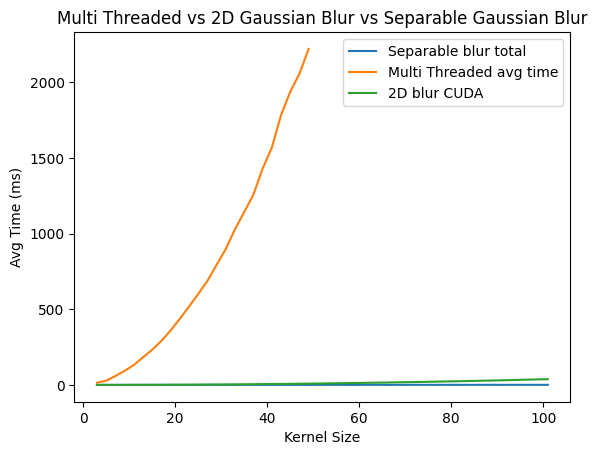

In [11]:
plt.title("Multi Threaded vs 2D Gaussian Blur vs Separable Gaussian Blur")
plt.plot(merged_df['kernel_size'],
        merged_df['Avg_Sum']/1000,
        label="Separable blur total ")
plt.plot(df_multi_thread['KERNEL_SIZE'],
        df_multi_thread['AVG_RUN_TIME'],
        label='Multi Threaded avg time')
plt.plot(df_2d_cuda['kernel_size'],
        df_2d_cuda['Avg']/1000,
        label='2D blur CUDA')
plt.xlabel('Kernel Size')
plt.ylabel('Avg Time (ms)')
plt.legend()
plt.show()